<a href="https://colab.research.google.com/github/VenkataSairohith-AiGeek/Ai_problem_s/blob/main/A__SEARCHING_ALGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
from collections import defaultdict

In [169]:
from queue import PriorityQueue

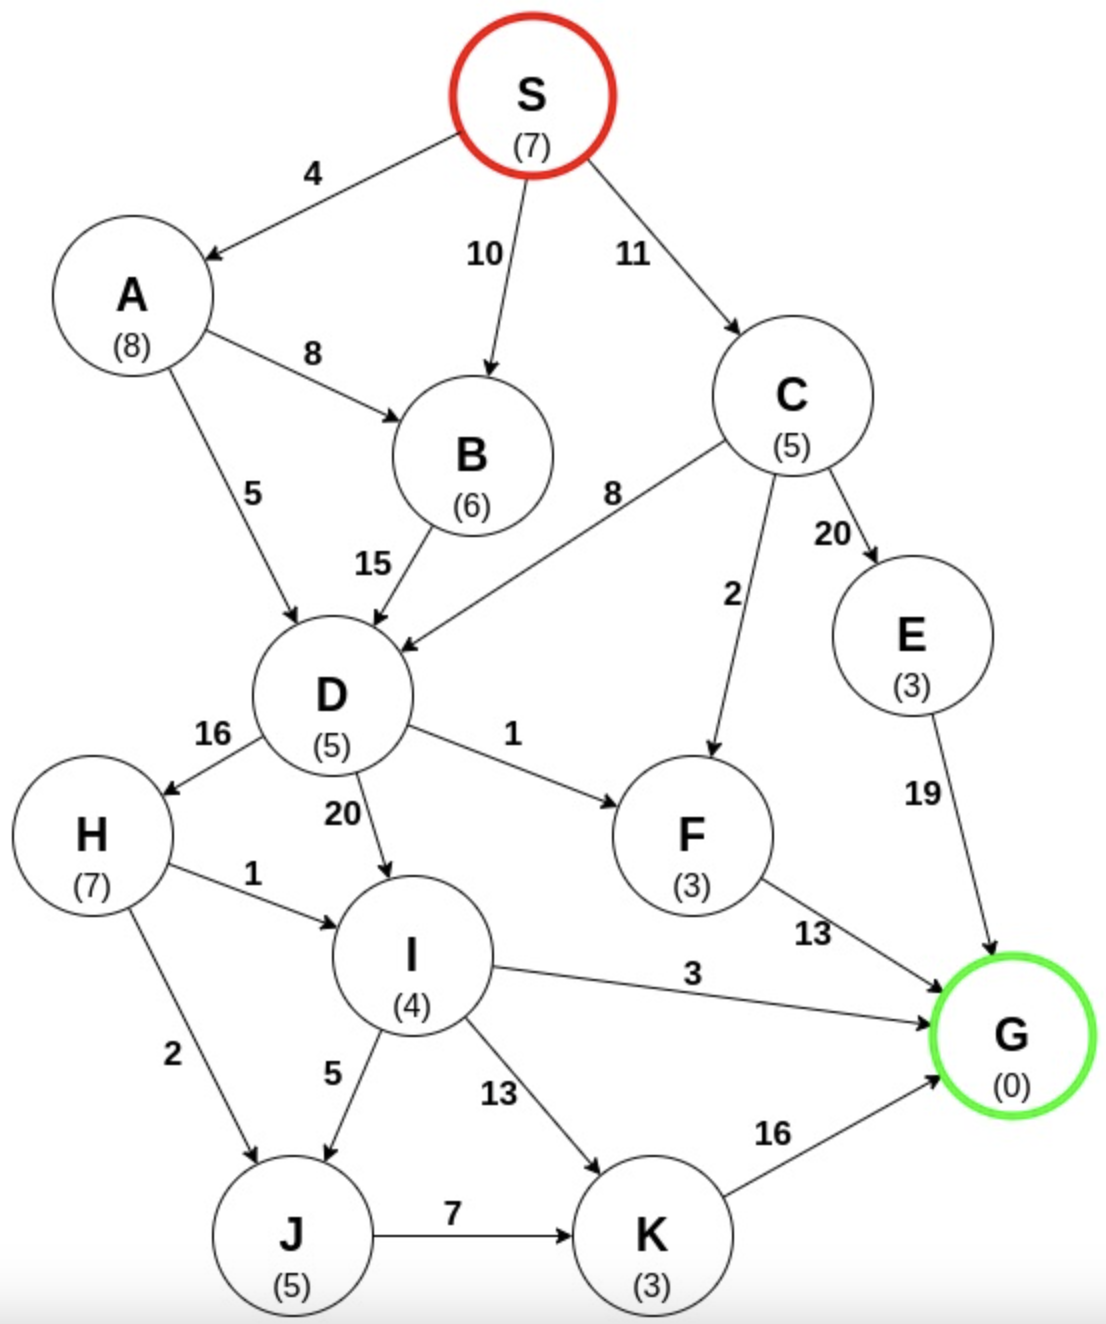

In [170]:
data= defaultdict(list)

data['S']=['A',4,'B',10,'C',11,7]           # name of the node followed by distance from the previous node, heuritic at the end of the list
data['A']= ['B', 8, 'D', 5, 8]
data['B'] = ['D', 15, 6]
data['C'] = ['D', 8, 'E', 20, 'F', 2, 5]
data['D'] = ['F', 1, 'H', 16, 'I', 20, 5]
data['E'] = ['G', 19, 3]
data['F'] = ['G', 13, 3]
data['G'] = [0]
data['H'] = ['I', 1, 'J', 2, 7]
data['I'] = ['G', 3, 'J', 5, 'K', 13, 4]
data['J'] = ['K', 7, 5]
data['K'] = ['G', 16, 3]

In [171]:
class Node:
  def __init__(self, name, p=None, g=0, h=0):         #define the structure of the node
    self.name = name
    self.p = p
    self.g = g
    self.h = h
  def __lt__(self,other):                             # Compare the priority of current and other each node
    if other == None:
      return False
    return self.g+self.h < other.g+other.h
  def __eq__(self,other):                              # Compare the Equality of current and other node
    if other == None:
      return False
    return self.name == other.name
  def display(self):                                  # Display the scan structure
    print(f'{self.name}- - - -{self.g}- - - -{self.h}')

In [172]:
# Check in priority
def checkin_priority(temp, c):
    if temp == None:
        return False
    return (temp in c.queue)

In [173]:
# get the path followed or visted
def get_path(O,Distance):
    O.display()
    Distance += O.g + O.h

    if O.p != None:
        get_path(O.p, Distance)
    else:
        print(f'Distance: {Distance}')

        return


In [174]:
def a_star_search(S=Node('S'), G=Node('G')):
    count=0
    Extend=PriorityQueue()
    Visited=PriorityQueue()

    S.h=data['S'][-1]
    Extend.put(S)

    while True:
      count+=1
      if Extend.empty():
        print('Search Failed')
        return
      O=Extend.get()
      Visited.put(O)
      print(f'scan{count}-{O.name}-{O.g}-{O.h}')
      # check if O is destination point
      if O.__eq__(G):
          print('Search success!')
          get_path(O, 0)

          return
      i=0
      while i <len(data[O.name])-1:
        name = data[O.name][i]
        temp = Node(name=name, g=O.g + data[O.name][i + 1], h=data[name][-1])
        temp.p = O
        if not checkin_priority(temp,Extend) and not checkin_priority(temp,Visited):
          Extend.put(temp)
        i+=2

In [175]:
a_star_search(Node('S'), Node('G'))

scan1-S-0-7
scan2-A-4-8
scan3-D-9-5
scan4-F-10-3
scan5-C-11-5
scan6-B-10-6
scan7-G-23-0
Search success!
G- - - -23- - - -0
F- - - -10- - - -3
D- - - -9- - - -5
A- - - -4- - - -8
S- - - -0- - - -7
Distance: 69
